# TensorFlow教程
前面，我们一直都是使用numpy来搭建神经网络。  
现在，我们将逐步使用深度学习的框架来更轻松的构建神经网络。 
机器学习框架有很多，例如： TensorFlow, PaddlePaddle, Torch, Caffe, Keras等。  
本次作业，我们要学习的是TensorFlow框架  
我们要学习的操作有： 
1. 初始化变量 
2. 建立自己的会话
3. 训练算法
4. 实现一个神经网络

使用框架可以大幅度缩短编码时间，同时进行优化，提高代码效率。 



## 初识TensorFlow 

首先，我们导入TensorFlow和一些其他的库

In [49]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import tf_utils
import time
np.random.seed(1)

In [2]:
tf.__version__

'2.6.0'

看一下 TensorFlow的版本，1.* 和2.* 的差别还是很大的。我这里用的是2.6  。

下面我们从第一个示例开始，尝试实现loss的计算  
$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [50]:
tf.compat.v1.disable_eager_execution()           #保证session.run()能够正常运行

y_hat = tf.constant(36, name='y_hat')            # 定义y_hat，赋初值为36 Define y_hat constant. Set to 36. 
y = tf.constant(39, name='y')                    # 定义y 赋初值为39 Define y. Set to 39
 
loss = tf.Variable((y - y_hat)**2, name='loss')  # 为loss函数创建一个变量 Create a variable for the loss
init = tf.compat.v1.global_variables_initializer()         # 稍后，运行init时(session.run(init) ) When init is run later (session.run(init)),                                    # the loss variable will be initialized and ready to be computed
                                                           # 此loss变量将被初始化，并准备计算 the loss variable will be initialized and ready to be computed
with tf.compat.v1.Session () as session:                    #创建一个session并打印输出   Create a session and print the output
    session.run(init)                            #初始化变量  Initializes the variables
    print(session.run(loss))                     # 打印loss值

9


In [51]:
tf.compat.v1.disable_eager_execution()

y_hat = tf.constant(36 , name='y_hat')
y = tf.constant(39 , name='y')

loss = tf.Variable( (y - y_hat)**2 , name = 'loss' )
init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as session: 
    session.run(init)
    print(session.run(loss))


9


### 在TensorFlow中编写和运行程序一般遵循以下步骤：   
1. 创建尚未执行/计算的变量
2. 编写变量间的操作
3. 初始化变量
4. 创建一个Session
5. 运行Session，-> 这将执行上面所编写的操作

所以，当我们为loss创建一个变量时，我们只是将loss定义为其他变量的函数，并没有见具体的值。  
为了计算它，我们需要运行`init=tf.global_variables_initializer()`。 这将初始化loss函数，同时，在最后一行，我们可以计算loss并打印其值

下面看一个更简单的例子

In [52]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
 
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


和上面输出的一样，我们的计算结果并不是20，而是一个Tensor类型的变量，没有维度，数据类型为int32，上面我们所作的只是将数据等一些内容放入“计算图”中，并没有实际的去计算，如果要计算，则必须创建一个会话进行计算。

In [53]:
sess = tf.compat.v1.Session ()
 
print(sess.run(c))

20


 总结一下：  首先初始化变量，然后创建会话，并在会话内进行计算。  
 下面，我们来了解一下占位符，占位符是一个对象，其具体值只能在稍后指定，如果要指定占位符的值，则需要通过一个feed字典('feed_dict')传入，下面，我们来试一试

In [54]:
#利用feed_dict来改变x的值
 
x = tf.compat.v1.placeholder(tf.int64,name="x")
print(sess.run(2 * x,feed_dict={x:3}))
sess.close()

6


初次定义x时，并不为其指定值，即：占位符只是一个变量，是在运行会话时，才会将数据分配给它，（通过feed_dict）  

其实：   
指定计算操作时，我们正告诉，TensorFlow如何构造计算图，计算图可以有占位符，可以在以后再指定值，最后，当我们运行会话进行计算时，为占位符指定具体值，并计算结果

### 1.1 - Linear function

我们计算下面这个等式来开始这个编程练习: $Y = WX + b$,这里的 $W 和 $X 是随机矩阵，b是随机向量。 


**练习**:计算$WX + b$ ，其中，$W , $S 和 $b 都来自随机正态分布，W的现状是（4，3），X的形状是（3，1），b的形状是（4，1）。
可以参考下面这段代码，用于定义一个形状为（3，1）的常量X  
```python
X = tf.constant(np.random.randn(3,1), name = "X")

```
你可能还会用到下面这些函数： 
- tf.matmul(..., ...) 做矩阵乘法。
- tf.add(..., ...) 做加法
- np.random.randn(...) 做随机初始化


In [55]:
def linear_function():
    """
    实现一个线性功能：
        初始化W为一个维度为（4，3）的tensor变量
        初始化X为一个维度为（3，1）的tensor变量
        初始化b为一个维度为（4，1）的tensor变量
    返回：
        result - 根据 Y = WX + b 运行session的结果
    """
    
    np.random.seed(1) #指定随机种子
    
    # 创建矩阵
    X = np.random.randn(3,1)
    W = np.random.randn(4,3)
    b = np.random.randn(4,1)
    
    Y = tf.add(tf.matmul(W,X),b) #tf.matmul -> 做矩阵乘法
    #Y = tf.matmul(W,X) + b #也可以以写成这样子
    
    #利用tf.session创建会话，并在要计算的变量上使用session.run()运行会话
    sess = tf.compat.v1.Session ()
    result = sess.run(Y)
    
    #计算完毕，关闭session
    sess.close()
    
    return result

In [56]:
print("result = " +  str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


*** Expected Output ***: 

<table> 
<tr> 
<td>
**result**
</td>
<td>
[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]
</td>
</tr> 

</table> 

### 1.2 - Computing the sigmoid   
非常好，我们已经实现了线性函数。  
TensorFlow提供了很多常用的神经网络函数，例如`tf.sigmoid` 和 `tf.softmax`。 现在，我们练习实现sigmoid函数 


这里我们将要用到前面提到过的占位符，我们创建一个变量x，在运行会话时，通过字典传入z。  
步骤： 
1. 创建占位符x
2. 定义计算sigmoid所需的操作， 可使用 `tf.sigmoid`
3. 运行会话


** 练习 **: 实现sigmoid函数。过程中你可能会用到下面的函数 

- `tf.placeholder(tf.float32, name = "...")`
- `tf.sigmoid(...)`
- `sess.run(..., feed_dict = {x: z})`


注： 在TensorFlow中创建并使用session一般使用下面两种方法： 

**方法 1:**
```python
sess = tf.Session()
#初始化（如果需要），然后计算  
result = sess.run(..., feed_dict = {...})
sess.close() # Close the session
```
**方法 2:**
```python
with tf.Session() as sess: 
    # 初始化（如果需要的话） 然后计算
    result = sess.run(..., feed_dict = {...})
    # 这里会自动关闭会话
```


In [57]:
def sigmoid(z):
    """
    实现sigmoid：
    
    参数：
        z - 输入变量，标量或矢量
    
    返回：
        result - z经过sigmoid计算后的值 即 sigmoid（z）
    
    """
    
    #创建一个占位符 x，名字叫 “x”
    x = tf.compat.v1.placeholder(tf.float32,name="x")
    
    #计算sigmoid(z)
    sigmoid = tf.sigmoid(x)
    
    #使用方法二创建会话，并运行  注意->通过字典传入变量
    with tf.compat.v1.Session () as sess:
        result = sess.run(sigmoid,feed_dict={x:z})
        
    return result

In [58]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999939


*** Expected Output ***: 

<table> 
<tr> 
<td>
**sigmoid(0)**
</td>
<td>
0.5
</td>
</tr>
<tr> 
<td>
**sigmoid(12)**
</td>
<td>
0.999994
</td>
</tr> 

</table> 

总结： 
1. 创建占位符
2. 创建计算图
3. 创建会话
4. 运行会话，注意是否要通过字典传入变量

### 1.3 -  Computing the Cost

我们可以使用内置函数来计算神经网络的cost，所以不需要编写代码计算$a^{[2](i)}$ and $y^{(i)}$ for i=1...m:

$$ J = - \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log a^{ [2] (i)} + (1-y^{(i)})\log (1-a^{ [2] (i)} )\large )\small\tag{2}$$

上面的公式你可以通过一行代码完成  

**练习**: 实现交叉熵损失，你将会用到下面的函数  


- `tf.nn.sigmoid_cross_entropy_with_logits(logits = ...,  labels = ...)`

你所编写的代码，应该接受输入z，然后通过sigmoid计算得出a，然后计算交叉熵损失$J$.所有的这些，都可以通过调用`tf.nn.sigmoid_cross_entropy_with_logits` 进行计算 

$$- \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log \sigma(z^{[2](i)}) + (1-y^{(i)})\log (1-\sigma(z^{[2](i)})\large )\small\tag{2}$$



In [59]:
# GRADED FUNCTION: cost

def cost(logits, labels):
    """
    使用 sigmoid 计算交叉熵损失
    
    参数: 
    logists -- 包含z的向量，来自上一个线性单元的输出
    labels -- 标签向量y （0 或 1）
     
    
    返回值:
    cost -- 运行会话计算多的的结果，即： cost  （参见公式2）
    """
    
    
    # 创建占位符
    z = tf.compat.v1.placeholder(tf.float32, name="z")
    y = tf.compat.v1.placeholder(tf.float32, name="y")

    
    # 使用 内置函数计算
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y)
    
    
    # 创建session 
    sess = tf.compat.v1.Session ()
    
    # 运行session 计算结果
    cost = sess.run(cost, feed_dict={z: logits, y: labels})
    
    # 关闭session
    sess.close()
    
    return cost

In [60]:
logits = sigmoid(np.array([0.2, 0.4, 0.7, 0.9]))
cost = cost(logits, np.array([0, 0, 1, 1]))
print ("cost = " + str(cost))

cost = [1.0053872  1.0366409  0.41385433 0.39956614]


** Expected Output** : 

<table> 
    <tr> 
        <td>
            **cost**
        </td>
        <td>
        [ 1.00538719  1.03664088  0.41385433  0.39956614]
        </td>
    </tr>

</table>

### 1.4 - Using One Hot encodings

很多时候，你会有一个y向量，数字范围是0-（C-1） 其中，C是分类数，如果C = 4 ，则情况如下


<img src="images/onehot.png" style="width:600px;height:150px;">

这成为热编码，因为在转换后，每一列只有一个值是’热的‘（为1），在numpy中，实现需要写几行代码，而在TensorFlow中只需要一行代码。 

- tf.one_hot(labels, depth, axis) 

**练习:** 实现下面的这个函数，输入一个标签向量，和一个类总数$C$ ， 并返回一个热编码（使用tf.one_hot来实现）


In [61]:
def one_hot_matrix(lables,C):
    """
    创建一个矩阵，其中第i行对应于第i个类编号，第j列对应于第j个训练示例。
    如果示例j的标签是i。那么结果矩阵（i，j）处的值是1。
    
    参数：
        lables - 标签向量
        C - 分类数
        
    返回：
        one_hot - 一个根据labels 和 C 得出的热矩阵
    
    """
    
    #创建一个tf.constant，赋值为C，名字叫C
    C = tf.constant(C,name="C")
    
    #使用tf.one_hot，计算热矩阵 注意axis的值
    one_hot_matrix = tf.one_hot(indices=lables , depth=C , axis=0)
    
    #创建session
    sess =tf.compat.v1.Session () 
    
    #运行session
    one_hot = sess.run(one_hot_matrix)
    
    #关闭session
    sess.close()
    
    return one_hot

In [62]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels,C=4)
print(str(one_hot))

[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


**Expected Output**: 

<table> 
    <tr> 
        <td>
            **one_hot**
        </td>
        <td>
        [[ 0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.]]
        </td>
    </tr>

</table>


### 1.5 - Initialize with zeros and ones

现在，我们学习如何初始化0向量和1向量，为了完成操作，我们要使用 `tf.ones()`函数 和`tf.zeros()`. 
函数，接收一个形状，返回一个全0或全1的指定维度的矩阵数组

**练习:**  实现下面的函数，接受一个维度值，返回维度为指定值的向量/矩阵 （shape的维度为1）

 - tf.ones(shape)


In [63]:
def ones(shape):
    """
    创建一个维度为shape的变量，其值全为1
    
    参数：
        shape - 指定的维度
    
    返回值：
        ones - 只包含1的数组 维度由参数指定    
    """
    
    #使用tf.ones() 创建
    ones = tf.ones(shape)
    
    #创建会话
    sess = tf.compat.v1.Session () 
    #运行会话
    ones = sess.run(ones)
    
    #关闭会话
    sess.close()
    
    return ones

In [64]:
print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


**Expected Output:**

<table> 
    <tr> 
        <td>
            **ones**
        </td>
        <td>
        [ 1.  1.  1.]
        </td>
    </tr>

</table>

## 2 - Building your first neural network in tensorflow

这部分，我们将要使用TensorFlow构建一个神经网络， 这将由两部分组成： 
1. 创建计算图
2. 运行计算图



下面，看一下我们要解决的问题： 


### 2.0 - Problem statement: SIGNS Dataset


一天下午，我们和一些朋友决定教我们的电脑破译手语。我们花了几个小时在一面白墙前拍照，得到了以下数据集。现在，你的工作是建立一种算法，以促进从言语障碍者到不懂手语的人之间的交流。


- **训练集**：1080张（64×64像素）的图片，表示0到5之间的数字（每个数字180张）。

- **测试集**：120张（64×64像素）的图片，表示从0到5的数字（每个数字20张）。

注： 这是符号数据集的一个子集。完整的数据集包含更多的符号。（练习，一般用较小的数据集，这样训练也快。实际应用的训练集一般都非常大）
 
下面是每个数字的示例以及标签如何表示。这是原始图片，是将图像分辨率讲到64 * 64之前的效果  
<img src="images/hands.png" style="width:800px;height:350px;"><caption><center> <u><font color='purple'> **Figure 1**</u><font color='purple'>: SIGNS dataset <br> <font color='black'> </center>




加载数据集

In [65]:
# 加载数据
X_train_orig , Y_train_orig , X_test_orig , Y_test_orig , classes = tf_utils.load_dataset()#加载数据集

Y = 1


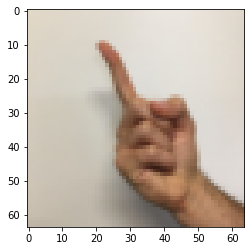

In [66]:
# 展示一个图片
index = 11
plt.imshow(X_train_orig[index])
print("Y = " + str(np.squeeze(Y_train_orig[:,index])))

In [67]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0],-1).T #展平数据
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0],-1).T
 
#归一化数据
X_train = X_train_flatten / 255
X_test = X_test_flatten / 255
 
#转换标签为独热矩阵
Y_train = tf_utils.convert_to_one_hot(Y_train_orig,6)
Y_test = tf_utils.convert_to_one_hot(Y_test_orig,6)
 
print("训练集样本数 = " + str(X_train.shape[1]))
print("测试集样本数 = " + str(X_test.shape[1]))
print("X_train.shape: " + str(X_train.shape))
print("Y_train.shape: " + str(Y_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("Y_test.shape: " + str(Y_test.shape))

训练集样本数 = 1080
测试集样本数 = 120
X_train.shape: (12288, 1080)
Y_train.shape: (6, 1080)
X_test.shape: (12288, 120)
Y_test.shape: (6, 120)


注： 12288 = 64 * 64 * 3

**我们的目标**是建立一种能够高精度识别符号的算法。为此，我们要构建一个tensorflow模型，该模型与之前在numpy中为cat识别构建的模型差不多（但现在使用softmax输出）。这是一个比较numpy实现和tensorflow实现的好机会。



**模型** 为*线性->RELU->线性->RELU->线性->SOFTMAX*。SIGMOID输出层已转换为SOFTMAX。SOFTMAX层可以将SIGMOID推广到两个以上的类。

### 2.1 - Create placeholders

我们的第一个任务就是为`X` 和 `Y` 创建占位符，这是为了后面我们运行是传入数据  

**练习:** 实现一个函数，功能是在TensorFlow中创建占位符  

In [68]:
def create_placeholders(n_x,n_y):
    """
    为TensorFlow会话创建占位符
    参数：
        n_x -- 标量，图片向量的大小（64*64*3 = 12288）
        n_y -- 标量，分类数（这里是从0到5，所以n_y = 6）
    
    返回值：
        X -- 对应数据输入的占位符，维度为[n_x, None]，数据类型是 "float"
        Y -- 对应输入标签的占位符，维度为[n_Y,None]，数据类型是 "float"
    
    提示：
        使用None，因为它让我们可以灵活处理占位符提供的样本数量。事实上，测试/训练期间的样本数量是不同的。
    
    """
    
    X = tf.compat.v1.placeholder(tf.float32, [n_x, None], name="X")#这里不同的版本可能会有点差别
    Y = tf.compat.v1.placeholder(tf.float32, [n_y, None], name="Y")
    
    return X, Y

In [69]:
X, Y = create_placeholders(12288, 6)
print("X = " + str(X))
print("Y = " + str(Y))

X = Tensor("X_4:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y_3:0", shape=(6, ?), dtype=float32)


**Expected Output**: 

<table> 
    <tr> 
        <td>
            **X**
        </td>
        <td>
        Tensor("Placeholder_1:0", shape=(12288, ?), dtype=float32) (not necessarily Placeholder_1)
        </td>
    </tr>
    <tr> 
        <td>
            **Y**
        </td>
        <td>
        Tensor("Placeholder_2:0", shape=(6, ?), dtype=float32) (not necessarily Placeholder_2)
        </td>
    </tr>

</table>

### 2.2 - Initializing the parameters

第二个任务是初始化TensorFlow中的参数  


**练习:** 实现下面的函数，初始化TensorFlow中的参数，对于权重，我们使用Xavier初始化，对于偏差，我们使用零初始化。   
例如： 对于W1 和 b1，我们可以参考下面这段代码 

```python
W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
```
使用 `seed = 1` 确保结果一致

In [70]:
def initialize_parameters():
    """
    初始化神经网络的参数，各参数的维度如下：
        W1 : [25, 12288]
        b1 : [25, 1]
        W2 : [12, 25]
        b2 : [12, 1]
        W3 : [6, 12]
        b3 : [6, 1]
    
    返回值：
        parameters - 包含了W1, b1, W2, b2, W3, b3 的 张量（tensors）字典
    
    
    """
    tf.random.set_seed(1) #指定随机种子
    
    # 初始化参数
    W1 = tf.compat.v1.get_variable("W1",[25,12288],initializer = tf.initializers.GlorotUniform(seed=1))
    b1 = tf.compat.v1.get_variable("b1",[25,1],initializer=tf.zeros_initializer())
    W2 = tf.compat.v1.get_variable("W2", [12, 25], initializer = tf.initializers.GlorotUniform(seed=1))
    b2 = tf.compat.v1.get_variable("b2", [12, 1], initializer = tf.zeros_initializer())
    W3 = tf.compat.v1.get_variable("W3", [6, 12], initializer = tf.initializers.GlorotUniform(seed=1))
    b3 = tf.compat.v1.get_variable("b3", [6, 1], initializer = tf.zeros_initializer())
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [71]:
ops.reset_default_graph() #用于清除默认图形堆栈并重置全局默认图形。 
 
with tf.compat.v1.Session ()  as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


**Expected Output**: 

<table> 
    <tr> 
        <td>
            **W1**
        </td>
        <td>
         < tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref >
        </td>
    </tr>
    <tr> 
        <td>
            **b1**
        </td>
        <td>
        < tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref >
        </td>
    </tr>
    <tr> 
        <td>
            **W2**
        </td>
        <td>
        < tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref >
        </td>
    </tr>
    <tr> 
        <td>
            **b2**
        </td>
        <td>
        < tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref >
        </td>
    </tr>

</table>

参数只有物理空间，并未赋值，因为我们还没有创建会话和运行。

### 2.3 - Forward propagation in tensorflow 

现在，我们要实现TensorFlow中的前向传播模块，该函数，接受一个参数字典，并完成前向传播，该函数可能会用到下面的几个函数  

- `tf.add(...,...)` 做加法
- `tf.matmul(...,...)` 做矩阵乘法
- `tf.nn.relu(...)` 应用ReLU激活函数

**问题:** 实现神经网络的前向传播，  我们会注释上numpy的等价实现，以便可以将tensorflow实现与numpy进行比较。最重要的是前向传播要在Z3处停止，因为在TensorFlow中最后的线性输出层的输出作为计算损失函数的输入，所以不需要A3.



In [72]:
def forward_propagation(X,parameters):
    """
    实现模型的前向传播，模型结构为LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    参数：
        X - 输入数据的占位符，维度为（输入节点数量，样本数量）
        parameters - 包含了W和b的参数的字典
    
    返回值：
        Z3 - 最后一个LINEAR节点的输出
    
    """
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    
                                            # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1,X),b1)        # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)     # Z3 = np.dot(W3,Z2) + b3
    
    
    return Z3

In [73]:
ops.reset_default_graph() #用于清除默认图形堆栈并重置全局默认图形。 
with tf.compat.v1.Session ()  as sess:
    X,Y = create_placeholders(12288,6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X,parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


**Expected Output**: 

<table> 
    <tr> 
        <td>
            **Z3**
        </td>
        <td>
        Tensor("Add_2:0", shape=(6, None), dtype=float32)
        </td>
    </tr>

</table>

你可能已经注意到，正向传播不会输出任何缓存。当我们解决完brackpropagation时，你就理解了。

### 2.4 Compute cost

就像前面一样，计算cost是非常简单的，我们可以使用： 
```python
tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ..., labels = ...))
```
**问题**: 实现下面的cost函数  

- 重要的是，要确保输入到`tf.nn.softmax_cross_entropy_with_logits`的 "`logits`" and "`labels`"的维度是符合预期的，所以，我们转置了Z3 和 Y  
- 还有就是  `tf.reduce_mean` 用于对示例进行求和

In [74]:
def compute_cost(Z3,Y):
    """
    计算cost
    
    参数：
        Z3 - 前向传播的结果
        Y - 正确的标签，一个占位符，和Z3的维度相同
        
    返回值：
        cost - 成本值
    
    
    """
    
    # 为了满足tf.nn.softmax_cross_entropy_的tensorflow要求
    logits = tf.transpose(Z3) #转置
    labels = tf.transpose(Y)  #转置
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
    
    return cost

In [75]:
ops.reset_default_graph()
 
with tf.compat.v1.Session () as sess:
    X,Y = create_placeholders(12288,6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X,parameters)
    cost = compute_cost(Z3,Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


**Expected Output**: 

<table> 
    <tr> 
        <td>
            **cost**
        </td>
        <td>
        Tensor("Mean:0", shape=(), dtype=float32)
        </td>
    </tr>

</table>

### 2.5 - Backward propagation & parameter updates

这就是框架的优势了，所有反向传播和参数更新都可以用一行代码完成。将其合并到模型中非常容易。

在计算成本函数之后。我们将创建一个“`optimizer`”对象。在运行tf.session时，调用此对象以及成本。调用时，它将使用选择的方法和学习率对给定的成本进行优化。


例如，对于梯度下降，对应的优化器是：   
```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
```

要进行优化，请执行以下操作： 
```python
_ , c = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
```
这将利用相反的顺序通过TensorFlow计算图来计算梯度。从cost 到 inputs


**注意** 编写代码时，我们经常使用 _ 作为一次性变量来接收我们稍后不需要使用的值。 这里，_ 接收我们不需要的优化器的评估值（并且c取值为成本变量的值）

### 2.6 - Building the model

现在，将所有的内容组合起来

**练习:** 实现这个模型，我们将调用前面已经实现的功能  

In [76]:
def model(X_train,Y_train,X_test,Y_test,
		learning_rate=0.0001,num_epochs=1500,minibatch_size=32,
		print_cost=True,is_plot=True):
    """
    实现一个三层的TensorFlow神经网络,模型结构为： LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX
    
    参数：
        X_train -- 训练集，维度为（输入大小（输入节点数量）= 12288, 样本数量 = 1080）
        Y_train -- 训练集分类数量，维度为（输出大小(输出节点数量) = 6, 样本数量 = 1080）
        X_test -- 测试集，维度为（输入大小（输入节点数量） = 12288, 样本数量 = 120）
        Y_test -- 测试集分类数量，维度为（输出大小(输出节点数量) = 6, 样本数量 = 120）
        learning_rate -- 优化的学习率
        num_epochs -- 整个训练集的遍历次数
        mini_batch_size -- minibatch的大小
        print_cost -- 是否打印成本，为真则每100代打印一次
        is_plot -- 是否绘制曲线图
    
    返回：
        parameters -- 学习得到的参数
    """
    ops.reset_default_graph() #可以重新运行模型而不覆盖tf变量
    tf.random.set_seed(1) # 保证结果相同
    seed = 3
    (n_x , m)  = X_train.shape               #获取输入节点数和样本数
    n_y = Y_train.shape[0]                   #获取输出节点数
    costs = []                               #成本集
    
    #给X和Y创建placeholder（占位符）
    X,Y = create_placeholders(n_x,n_y)
    
    #初始化参数
    parameters = initialize_parameters()
    
    #前向传播 在TensorFlow计算图中构建前向传播
    Z3 = forward_propagation(X,parameters)
    
    #计算成本 给TensorFlow计算图添加cost计算
    cost = compute_cost(Z3,Y)
    
    #反向传播，定义TensorFlow优化器，这里我们使用Adam优化
    optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    #初始化所有的参数和变量
    init = tf.compat.v1.global_variables_initializer()
    
    #开始会话并计算
    with tf.compat.v1.Session () as sess:
        #初始化
        sess.run(init)
        
        #正常训练的循环
        for epoch in range(num_epochs):
            
            epoch_cost = 0  #每代的成本
            num_minibatches = int(m / minibatch_size)    #minibatch的总数量
            seed = seed + 1
            minibatches = tf_utils.random_mini_batches(X_train,Y_train,minibatch_size,seed)
            
            for minibatch in minibatches:
                
                #选择一个minibatch用于此次迭代
                (minibatch_X,minibatch_Y) = minibatch
                
                #开始运行session，注意feed_dict 传递数据
                _ , minibatch_cost = sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})
                
                #计算这个minibatch在这一代中所占的误差
                epoch_cost = epoch_cost + minibatch_cost / num_minibatches
                
            #记录，打印成本
            if epoch % 5 == 0:
                costs.append(epoch_cost) # 记录
                #是否打印
                if print_cost and epoch % 100 == 0:
                        print("epoch = " + str(epoch) + "    epoch_cost = " + str(epoch_cost))
        
        #是否绘制图谱
        if is_plot:
            plt.plot(np.squeeze(costs))
            plt.ylabel('cost')
            plt.xlabel('iterations (per tens)')
            plt.title("Learning rate =" + str(learning_rate))
            plt.show()
        
        #保存学习得到的参数
        parameters = sess.run(parameters)
        print("参数已经保存到session。")
        
        #计算当前的预测结果
        correct_prediction = tf.equal(tf.argmax(Z3),tf.argmax(Y))
        
        #计算准确率
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))
        
        print("训练集的准确率：", accuracy.eval({X: X_train, Y: Y_train}))
        print("测试集的准确率:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

epoch = 0    epoch_cost = 1.8665231249549175
epoch = 100    epoch_cost = 0.8127114574114482
epoch = 200    epoch_cost = 0.5717915585546782
epoch = 300    epoch_cost = 0.39651923739548883
epoch = 400    epoch_cost = 0.2729283634460334
epoch = 500    epoch_cost = 0.19333272178967792
epoch = 600    epoch_cost = 0.12590982087633826
epoch = 700    epoch_cost = 0.08381715574950888
epoch = 800    epoch_cost = 0.055905664339661605
epoch = 900    epoch_cost = 0.03187120914685004
epoch = 1000    epoch_cost = 0.02209022968555942
epoch = 1100    epoch_cost = 0.011794816984823252
epoch = 1200    epoch_cost = 0.00876782861340678
epoch = 1300    epoch_cost = 0.005689190961702757
epoch = 1400    epoch_cost = 0.0031682388913450822


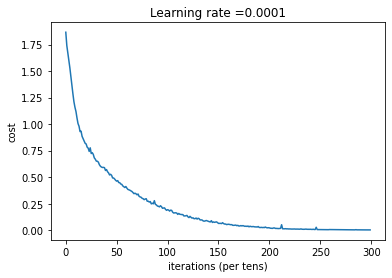

参数已经保存到session。
训练集的准确率： 1.0
测试集的准确率: 0.85833335
CPU的执行时间 = 171.54330796800002 秒


In [77]:
#开始时间
start_time = time.perf_counter() 
#开始训练
parameters = model(X_train, Y_train, X_test, Y_test)
#结束时间
end_time = time.perf_counter() 
#计算时差
print("CPU的执行时间 = " + str(end_time - start_time) + " 秒" )

**Expected Output**:

<table> 
    <tr> 
        <td>
            **Train Accuracy**
        </td>
        <td>
        1.0
        </td>
    </tr>
    <tr> 
        <td>
            **Test Accuracy**
        </td>
        <td>
        0.85833335
        </td>
    </tr>

</table>

现在，我们的算法应可以识别0-5的手势，准确率0.85。也还行哈

**提示**:
- 模型似乎是可以承载0-5的计算，但是好像存在过拟合化问题。后面你可以添加正则化项来解决该问题

In [31]:
one_hot_matrix([1],5).T

array([[0., 1., 0., 0., 0.]], dtype=float32)

### 2.7 - Test with your own image (optional / ungraded exercise)

In [100]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from PIL import Image
# num_px = 64
# image = Image.open('1.jpg')
 
# my_image = np.array(image.resize((num_px,num_px),Image.ANTIALIAS))
# plt.imshow(my_image) 

# my_image = my_image.reshape(num_px*num_px*3 , -1)
# # my_y = np.array([0,1,0,0,0,0])
# my_y = one_hot_matrix([1],6).T
# Z3 = tf_utils.forward_propagation_for_predict(my_image,parameters)
# my_y = np.array(my_y).T
# correct_prediction = tf.equal(tf.argmax(Z3),tf.argmax(my_y))
# with tf.Session() as sess:
#     print("ans is ",correct_prediction.eval(session=sess) )

In [101]:
def test_my_image( image_name , ans ):
    num_px = 64
    image = Image.open(image_name)
 
    my_image = np.array(image.resize((num_px,num_px),Image.ANTIALIAS))
    plt.imshow(my_image) 

    my_image = my_image.reshape(num_px*num_px*3 , -1)
    my_y = one_hot_matrix([ans],6).T
    Z3 = tf_utils.forward_propagation_for_predict(my_image,parameters)
    my_y = np.array(my_y).T
    correct_prediction = tf.equal(tf.argmax(Z3),tf.argmax(my_y))
    with tf.Session() as sess:
        print("ans is ",correct_prediction.eval(session=sess) )

ans is  [ True]


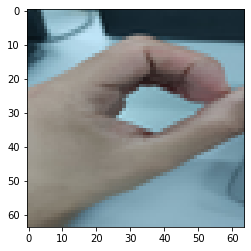

In [102]:
test_my_image('0.jpg',0)

ans is  [False]


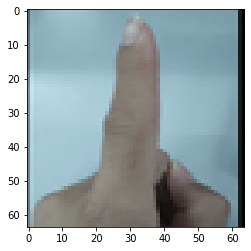

In [103]:
test_my_image('1.jpg',1)

ans is  [ True]


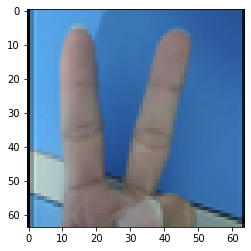

In [104]:
test_my_image('2.jpg',2)

ans is  [False]


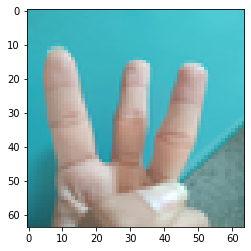

In [105]:
test_my_image('3.jpg',3)

ans is  [False]


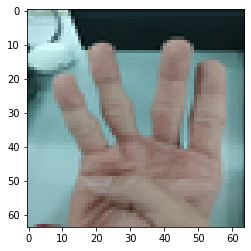

In [106]:
test_my_image('4.jpg',4)

果然还是有点 人工智障的感觉哈